# Forecasting(Airlines_data)

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel(r"D:\Excelr\assignments\Forecasting\Airlines+Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
data.shape

(96, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
# Getting dummy variables 
Months_Dummies = pd.DataFrame(pd.get_dummies(data['Month']))
data_dm = pd.concat([data,Months_Dummies],axis = 1)
data_dm.head()

,Month,Passengers,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2002-03-01 00:00:00,2002-04-01 00:00:00,2002-05-01 00:00:00,2002-06-01 00:00:00,2002-07-01 00:00:00,2002-08-01 00:00:00,2002-09-01 00:00:00,2002-10-01 00:00:00,2002-11-01 00:00:00,2002-12-01 00:00:00
0,1995-01-01,112,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


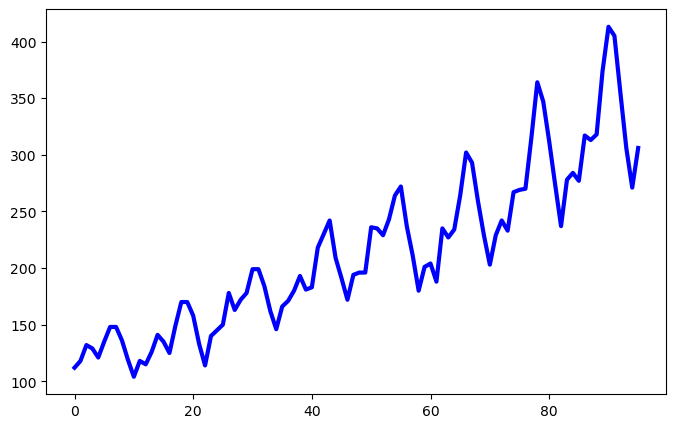

In [6]:
# Lineplot for passengers
plt.figure(figsize=(8,5))
plt.plot(data['Passengers'], color = 'blue', linewidth=3)

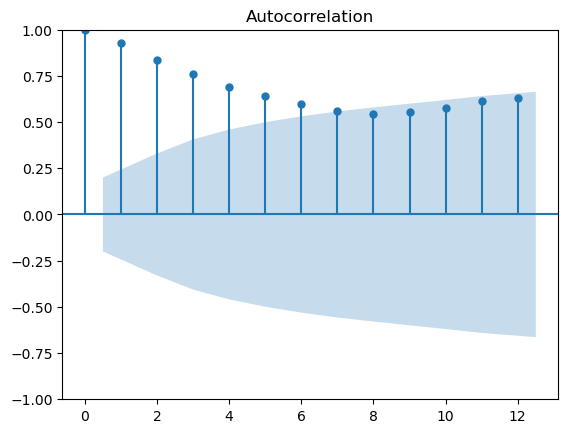

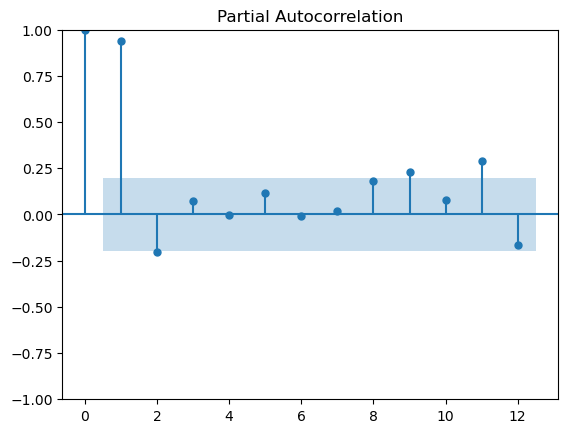

In [7]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()

## Data Driven Forecasting Methods

In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [9]:
#Splitting Data into Train and Test (77/33)
Train = data.head(84)
Test = data.tail(12)

## Moving Average Method

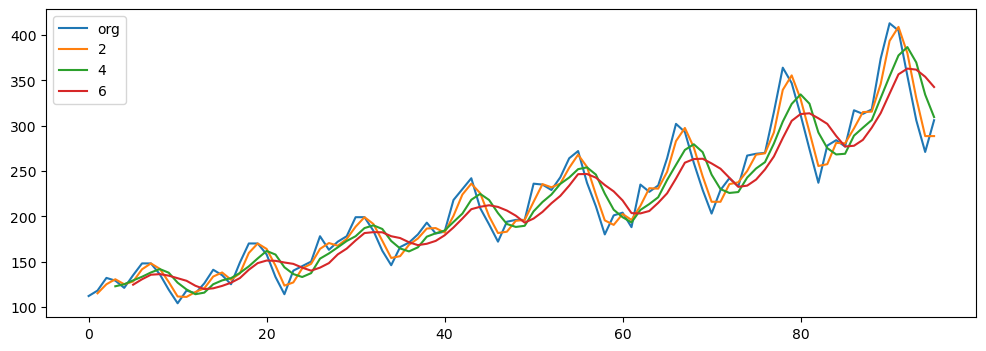

In [10]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,8,2):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## Time Series Decomposition plot

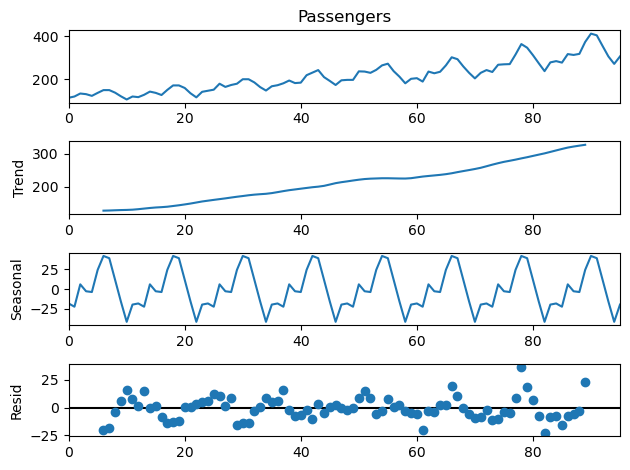

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

## Evaluation Metric RMSE

In [12]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

## Simple Exponential Method

In [13]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses = RMSE(Test.Passengers, pred_ses)
rmse_ses

68.00674031349644

## Holt Method

In [14]:
hw_model = Holt(Train["Passengers"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw = RMSE(Test.Passengers, pred_hw)
rmse_hw

58.57384693071804

## Holts winter exponential smoothing with additive seasonality and additive trend

In [15]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add = RMSE(Test.Passengers, pred_hwe_add_add)
rmse_hwe_add_add

62.71208217570936

## Holts winter exponential smoothing with additive seasonality and additive trend

In [16]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_mul_add = RMSE(Test.Passengers, pred_hwe_mul_add)
rmse_hwe_mul_add

64.66373828300254

## Model based Forecasting Methods

In [17]:
# Data preprocessing for models
data["t"] = np.arange(1,97)
data["t_squared"] = data["t"]*data["t"]

data["log_psngr"] = np.log(data["Passengers"])

data.head()

,Month,Passengers,t,t_squared,log_psngr
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791


In [18]:
# Splitting data into Train and Test (77/33)
Train = data.head(84)
Test = data.tail(12)

In [19]:
Train.head()

,Month,Passengers,t,t_squared,log_psngr
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791


In [20]:
Test.head()

,Month,Passengers,t,t_squared,log_psngr
84,2002-01-01,284,85,7225,5.648974
85,2002-02-01,277,86,7396,5.624018
86,2002-03-01,317,87,7569,5.758902
87,2002-04-01,313,88,7744,5.746203
88,2002-05-01,318,89,7921,5.762051


## Linear Model

In [21]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = RMSE(Test['Passengers'], pred_linear)
rmse_linear

53.199236534802715

## Exponential Model

In [22]:
Exp = smf.ols('log_psngr~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = RMSE(Test['Passengers'], np.exp(pred_Exp))
rmse_Exp

46.0573611031562

## Quadratic Model

In [23]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_quad_model = RMSE(Test['Passengers'], pred_Quad)
rmse_quad_model

48.05188897933095

In [24]:
list = [['Simple Exponential Method',rmse_ses], ['Holt method',rmse_hw],
          ['HW exp smoothing add',rmse_hwe_add_add],['HW exp smoothing mult',rmse_hwe_mul_add],
          ['Linear Mode',rmse_linear],['Exp model',rmse_Exp],['Quad model',rmse_quad_model]]
         

In [25]:
df = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
df

,Model,RMSE_Value
0,Simple Exponential Method,68.006740
1,Holt method,58.573847
2,HW exp smoothing add,62.712082
3,HW exp smoothing mult,64.663738
4,Linear Mode,53.199237
5,Exp model,46.057361
6,Quad model,48.051889


## Building final model with least RMSE value

In [26]:
data.head()

,Month,Passengers,t,t_squared,log_psngr
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791


In [27]:
final_model = smf.ols('Passengers~t+t_squared',data=data).fit()
pred_final = pd.Series(final_model.predict(data[['t','t_squared']]))
rmse_final_model = RMSE(data['Passengers'], pred_final)
rmse_final_model

29.590971625300256

In [28]:
pred_df = pd.DataFrame({'Actual' : data.Passengers, 'Predicted' : pred_final})
pred_df

,Actual,Predicted
0,112,119.158137
1,118,120.460303
2,132,121.784439
3,129,123.130544
4,121,124.498617
...,...,...
91,405,327.618598
92,355,330.919950
93,306,334.243270
94,271,337.588559
